# ARMA & ARIMA

### Learning Outcomes
1. [Introduction](#Introduction)
2. [Moving Average (MA) Model](#Moving-Average-(MA)-Model)
3. [Autoregressive (AR) Model & Forecasting](#Autoregressive-(AR)-Model-&-Forecasting)
4. [Autoregressive Moving Average (ARMA)](#Autoregressive-Moving-Average-(ARMA))
5. [Autoregressive Integrated Moving Average (ARIMA)](#Autoregressive-Integrated-Moving-Average-(ARIMA))

# Introduction

Predicting the future is a challenging problem, especially if we have limited knowledge about a given phenomenon. However, we can still learn from past patterns to make an educated projection of the future.
Time series are observational data of a given metric across time (e.g., daily change in temperature during a month). Analysis of these datasets allows us to disentangle regularities in historical observations (e.g., the temperature rises in summer and decreases in winter) and use them to make an informed decision about the future's potential changes.

After having gone over statationarity, there are various frameworks that take advantage of time series that exhibit stationarity (weak) for making predictions. Today we will go over the __autoregressive moving average (ARMA)__ model and its constituent components, the __autoregressive (AR)__ and __moving average (MA)__ models. We will then see how we can elaborate on the ARMA framework for the analysis of non-stationary time series.

__Recap__: Stationarity can be either **weak** (when the distribution of time-series has a constant mean and variance) or **strong** (if the time series has the same distribution over any time interval)

# Moving Average (MA) Model

The first and arguably the simplest component of the ARMA model is the moving average model, also referred to as an __MA process.__ This model specifies that the output variable depends linearly on the current and various past values of an imperfectly predictable term. The value of a MA(q) process at time $t$ is given as follows:

$$Y_t=\beta_0 +\beta_1\times\epsilon_{t-1}+\beta_2\times\epsilon_{t-2}+...+\beta_q\times\epsilon_{t-q} + \epsilon_{t}$$

Where $\beta_{0}$ is the mean of the series, $\beta_{i}$ are the parameters of the model, and $\epsilon_{i}$ are the error terms, which under stationarity assumptions, are assumed to follow a normal distribution with fixed variance. From the definition, we can see that this model is simply a linear regression of the current value of the series against current and previous (observed) error terms. Given that this is linear regression, an MA(q) is a model of order $q$, where the model order is a __hyperparameter__ of the model.

Note the term $\epsilon_{t}$ is only included in the model to show that if we knew the exact error at the current time, we would be able to perfectly model the given time step. Since this is not the case in practice, if we assume that this term follows a normal distribution, the best prediction will involve setting it to 0, as shown below:

$$\hat{Y}_{t}=\beta_0+\beta_1\times\epsilon_{t-1}+\beta_2\times\epsilon_{t-2}+...+\beta_q\times\epsilon_{t-q}$$

Let us a very simple example: Let us assume that you are in charge of bringing cupcakes to a monthly event, but the organiser tells you after the event that you brought either too many or too little cupcakes. If we assume that the amount that we are wrong by follows a normal distribution, I can try to model this with an MA(1) model:

$$\hat{Y}_{t}=\beta_0+\beta_1\times\epsilon_{t-1}$$

Where $\hat{Y}_{t}$ is the number of cupcakes I predict I should bring every month. If we assume from the start that the mean is $\beta_{0}=10$, and our parameter $\beta_{1}=0.5$, such that we only use half of the error, we can use that as our prediction for the first party, at $t=1$. If we follow this process and take some feedback from the organiser, then we would probably get something along the lines of the table below: 

<img src="../images/cupcakes.png" style="width:300px; height:250px; position:relative; left:400px;">

Which we can see fluctuates about the mean and uses the error term to predict a value closer to the previous true value. If we plot this we can see this trend a bit clearer:

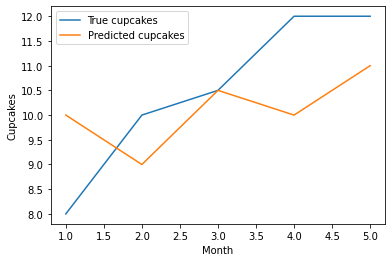

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting simple MA(1) predictions
labels = np.array([8, 10, 10.5, 12, 12])
predictions = np.array([10, 9, 10.5, 10, 11])
time = np.linspace(1, 5, 5)

fig = plt.figure()
plt.plot(time, labels)
plt.plot(time, predictions)
plt.xlabel("Month")
plt.ylabel("Cupcakes")
plt.legend(("True cupcakes", "Predicted cupcakes"))
fig.show()


Even for the few data points we have we can see that the moving average model remains centered about our mean, which highlights an interesting property: MA processes are always stationary.

We have said that the model order is a hyperparameter, but is there any method to figure out what the optimal model order given a time series? The answer is yes, we can use what is known as the __autocorrelation function (ACF)__ of the process. So far, we have covered the covariance between two random variables, which is a measure of joint variability, given by the equation:

$$cov(X, Y) = \frac{1}{N} \sum_{i}^{N} (X_{i}-\mu_{X})(Y_{i}-\mu_{Y})$$

The interesting thing about covariance is that it is a metric of correlation. So how can this be applied to MA models? Well, if our model is dependent on the previous errors, it must also depend on the previous predictions made. Therefore, we can define something known as __autocovariance__, which is obtained by finding the covariance of our random variable and itself at different timelags. This allows us to see whether our current prediction is correlated with our prediction from 1 time lag ago, or 2 time lags ago and so on.

This is the principal idea: correlation with previous values. But we need to expand upon this further. From the equation of covariance, we can see that the magnitude varies depending on how large the values are, which means there is no way to interpret whether a given value for our autocovariance shows a possible correlation or not. Therefore, we scale all the values obtained in our autocovariance by the autocovariance at 0 time lags, which we see below:

$$cov(Y, Y) = \frac{1}{N} \sum_{i}^{N} (Y_{i}-\mu_{Y})(Y_{i}-\mu_{Y}) = \frac{1}{N} \sum_{i}^{N} (Y_{i}-\mu_{Y})^{2} = \sigma_{y}^{2}$$

Is just the variance of our time series! This scaled autocovariance for different time lags is known as the __autocorrelation function__, and is a function dependent on __time-lag__. Don't worry too much about the exact calculation of the ACF, but just keep in mind that for a given time lag, the ACF gives us a measure of how correlated a time series is with itself shifted in time either forwards or backwards.

But a question all of you may be thinking is: __WHY DO WE CARE ABOUT THE ACF?__

Let us generate our own MA(q) model using _statsmodels_ and plot the resulting time series and ACF. Given the assumption that the errors follow a normal distribution, we can generate an MA model of any order with random values following the same distribution. What do we see?

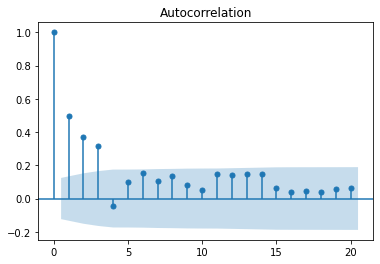

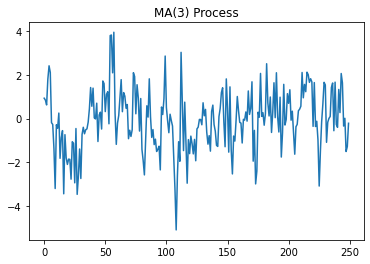

In [2]:
# Plotting time series and corresponding ACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess

# Generating process
ma = np.array([1, 0.65, 0.7, 0.9]) # MA parameters (1 must be included as the coefficient of the zero lag term)
arma_process = ArmaProcess(np.array([1]), ma)
y = arma_process.generate_sample(250) # Generate 250 observations from sample

# Plotting
plot_acf(y, lags=20)
fig = plt.figure()
plt.plot(range(0, len(y)), y)
plt.title("MA({}) Process".format(len(ma)-1))
fig.show()


What we see is that the ACF drops after the $q_{th}$ time lag. Not only does the plot of the ACF give us a qualitative way to assess whether an MA model is appropriate, but it also helps us determine the optimal model order. There are other more complex methods to quantitatively assess model order, but the ACF approach is sufficient.

Now that we have considered an MA model, we will look at the other half of the ARMA model: the AR model.

# Autoregressive (AR) Model & Forecasting

The autoregressive model or __process__ works on similar principles to its MA counterpart, but rather than carrying out linear regression on the previous errors, we carry out linear regression on the past observed values themselves, hence why it is called an __AUTO-REGRESSIVE__ model. An AR(p) model is given as follows:

$$Y_t=\alpha_0+\alpha_1\times Y_{t-1}+\alpha_2\times Y_{t-2}+...+\alpha_p\times Y_{t-p} + \epsilon_{t}$$

Where the model order is given by $p$, $\alpha_{0}$ is a constant, $\alpha_{i}$ are the parameters and $\epsilon_{t}$ is the associated noise which represents the error between our prediction and the observed value. To make a prediction at time $t$, we can do as we did for the MA model and neglect the noise term.

$$\hat{Y_t}=\alpha_0+\alpha_1\times Y_{t-1}+\alpha_2\times Y_{t-2}+...+\alpha_p\times Y_{t-p}$$

As before, the model order $p$ is a hyperparameter. Now that we have the structure of our model set, let us generate an AR(p) model below just as we have generated an MA model above and see what its ACF looks like. 

__*Note:__ When using _statsmodels_ and some other modules, you must input the negative values of the coefficients as in the conventional AR(p) model equation as there are different representations of AR(p) processes.

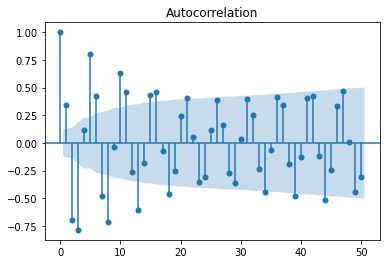

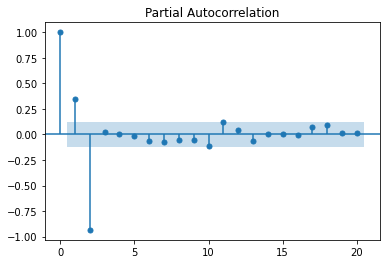

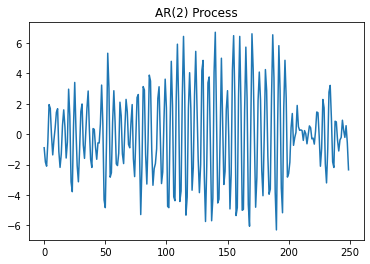

In [3]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plotting time series and corresponding ACF

# Generating process
ar_params = np.array([0.65, -0.9])
ar = np.r_[1, -ar_params]
arma_process = ArmaProcess(ar, np.array([1]))
y = arma_process.generate_sample(250) # Generate 250 observations from sample

# Plotting
plot_acf(y, lags=50)
plot_pacf(y, lags=20)
fig = plt.figure()
plt.plot(range(0, len(y)), y)
plt.title("AR({}) Process".format(len(ar_params)))
fig.show()

Well this ACF plot  doesn't tell us much. We see that whatever AR(p) processes are plotted above are not so different from the MA(q) models we plotted above. However, the ACF does not drop off after the $q_{th}$ time lag. Furthermore, after it 'sort' of drops off, it seems to be oscilatting a bit, why is this the case? The reason for this is that the ACF does not exclude indirect effects. Consider the case of an AR(1) model:

$$\hat{Y_{t}} = \alpha_{0} + \alpha_{1} \times Y_{t-1}$$

If we wanted to find the ACF for a time lag of 2, hence $corr(Y_{t}, Y_{t-2})$, given the equation would this be high or low? Well, there is no _direct_ effect of $Y_{t-2}$ on $Y_{t}$. However, there is a direct effect on $Y_{t-1}$, which has a direct effect on $Y_{t}$, leading to an indirect effect, which is also captured by the ACF. This means that the ACF cannot be used as it is used for an MA(q) model. Therefore, we must use a different measure that exlcudes these indirect effects. Hence, we can instead use the __partial autocorrelation function (PACF)__, which is a form of the ACF which excludes indirect effects. While the mathematics behind how it is calculated is beyond the scope of this course, _statsmodel_ is kind enough to do the heavy-lifting for us.

__*Note:__ Unlike for MA processes, there are particular restrictions on AR(p) model coefficients for stationarity. These are beyond the scope of this course, but keep in mind that for certain combinations of parameters, the generated sample may 'explode'.

So we have seen how we can use previous observations to predict the next time step ahead for a given AR(p) model. How do we expand this to $n$ time steps ahead? We simply replace the __previous observations__ with __previous predictions__. Consider the following equation:

$$\hat{Y_t}=\alpha_0+\alpha_1\times Y_{t-1}+\alpha_2\times Y_{t-2}+...+\alpha_p\times Y_{t-p}$$

If we would like to predict one-time step ahead, we can replace what would ideally be the observation at time step $Y_{t}$ with the observation $\hat{Y_{t}}$:
$$\hat{Y_{t+1}}=\alpha_0+\alpha_1\times \hat{Y_{t}}+\alpha_2\times Y_{t-1}+...+\alpha_p\times Y_{t-p +1}$$

Which is an approach which we can extend for yet another time step ahead:
$$\hat{Y_{t+2}}=\alpha_0+\alpha_1\times \hat{Y_{t+1}}+\alpha_2\times \hat{Y}_{t}+...+\alpha_p\times Y_{t-p+2}$$

And eventually extended to any $n$ steps ahead. Of course, as we use more and more predictions rather than observations in our forecast, our deviation will worsen and worsen. The number of steps ahead of the last time point in our series, referred to as the __origin__, is known as the __lead time__. Below we show a forecast for the number of sunspots (temporary phenomena on the Sun's photosphere) observed (monthly mean). Don't worry, we are covering how to obtain the optimal parameters soon. For now, we will allow _statsmodel_ to, yet again, do the heavy-lifting.


In [5]:
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

# Importing and extracting relevant data
sunspots = pd.read_csv("../../DATA/sunspots.csv")
sun_data = sunspots["Monthly Mean Total Sunspot Number"][-999:] # only last 1000 months

## Testing stationarity using augmented dickey-fuller's test

## Plotting ACF, PACF & time series
sunspots


,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3247,3247,2019-08-31,0.5
3248,3248,2019-09-30,1.1
3249,3249,2019-10-31,0.4
3250,3250,2019-11-30,0.5


As from the PACF graph, it does not seem clear as to where it drops off between p=2, 3 or 4, we will proceed for now with AR(2). We will show another method of comparing model orders later along this notebook.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      ARMA Model Results                                     
=============================================================================================
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                  990
Model:                                    ARMA(2, 0)   Log Likelihood               -4637.022
Method:                                      css-mle   S.D. of innovations             26.149
Date:                               Tue, 13 Oct 2020   AIC                           9282.045
Time:                                       12:41:15   BIC                           9301.636
Sample:                                            0   HQIC                          9289.494
                                                                                             
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      97.1580     16.455      5.904      0.000      64.906     129.410
ar.L1.Monthly Mean Total Sunspot Number     0.7031      0.031     22.835      0.000       0.643       0.763
ar.L2.Monthly Mean Total Sunspot Number     0.2475      0.031      8.027      0.000       0.187       0.308
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0408           +0.0000j            1.0408            0.0000
AR.2           -3.8813           +0.0000j            3.8813            0.5000
-----------------------------------------------------------------------------
"""

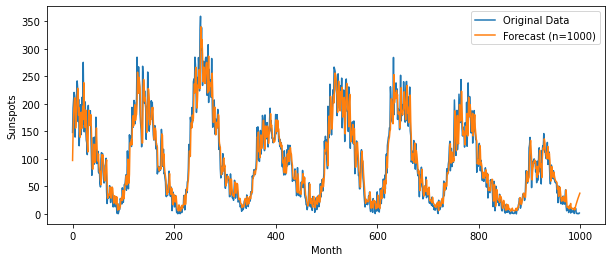

In [27]:
# Splitting into test and train data
train = sun_data[:990]
test = sun_data[990:]

## Fitting model(ARMA(2, 0)) and showing predictions for both train and test sets (Hint: use .predict() method)

## Print model summary

## Plot riginal data and model predictions (on train and test sets)

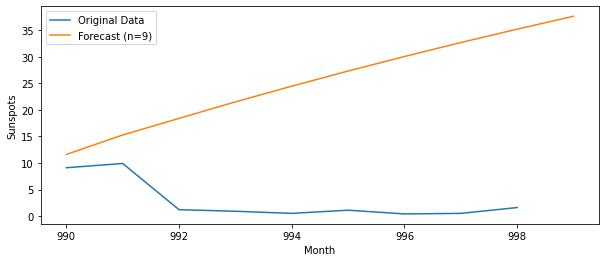

In [31]:
# You should see this if done correctly
fig = plt.figure(figsize=(10, 4))
plt.ylabel('Sunspots')
plt.xlabel('Month')
plt.plot(range(990, len(sun_data)), sun_data[990:])
plt.plot(range(990, len(sun_data)+1), forecast[990:])
plt.legend(("Original Data", "Forecast (n={})".format(len(test))))
fig.show()

Looking at this forecast, we can see that as the lead time increases, the forecast tends towards the mean of the time series. Vanilla AR models are seldom used for forecasting for larger lead times.

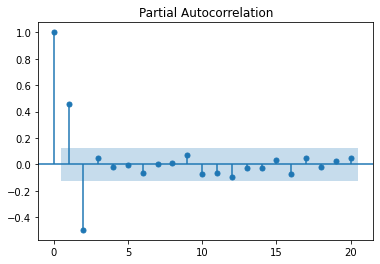

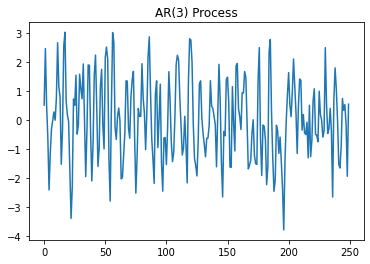

In [13]:
# Plotting time series and corresponding PACF
from statsmodels.graphics.tsaplots import plot_pacf

# Generating process
ar_params = np.array([0.7, -0.5]) # MA parameters (1 must be included as the coefficient of the zero lag term)
ar = np.r_[1, -ar_params]
arma_process = ArmaProcess(ar, np.array([1]))
y = arma_process.generate_sample(250) # Generate 250 observations from sample

# Plotting
plot_pacf(y, lags=20)
fig = plt.figure()
plt.plot(range(0, len(y)), y)
plt.title("AR({}) Process".format(len(ar)))
fig.show()


## Autoregressive Moving Average (ARMA) Model

The autoregressive moving average model or process, is the combination of what we have looked at so far: a linear regression on both previous observations and previous observed errors. An ARMA(p,q) process is modelled as follows:

$$Y_t=\alpha_0+\alpha_1\times Y_{t-1}+\alpha_2\times Y_{t-2}+...+\alpha_p\times Y_{t-p} +\beta_1\times\epsilon_{t-1}+\beta_2\times\epsilon_{t-2}+...+\beta_q\times\epsilon_{t-q} + \epsilon_{t}$$

As before, we can use this for forecasting the next step by not considering the error term, $\epsilon_{t}$:
$$\hat{Y}_t=\alpha_0+\alpha_1\times Y_{t-1}+\alpha_2\times Y_{t-2}+...+\alpha_p\times Y_{t-p} +\beta_1\times\epsilon_{t-1}+\beta_2\times\epsilon_{t-2}+...+\beta_q\times\epsilon_{t-q}$$

For the case of an ARMA(p,q) process, we now have a model order of $p+q+1$. Let us generate some ARMA models below so that we can more closely analyse their behaviour.

Great so we can see that we are somtimes able to gauge the optimal hyperparameters $p$ and $q$ from the ACF and PACF, but this may not always be the case. At the end of the day, these are hyperparameters and we can't always find the optimal model order for ARMA processes. After choosing a given $p$ and $q$ we can then compute the optimal parameters. How are the optimal parameters computed? Generally, since we are carrying out regression, they can be determined using something you all already know: __least squares regression.__

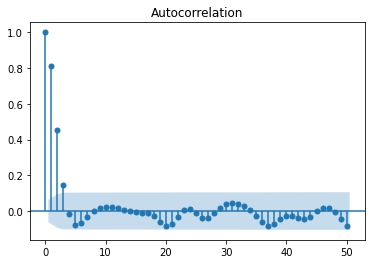

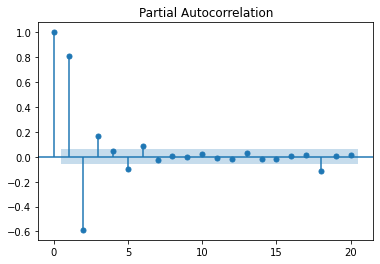

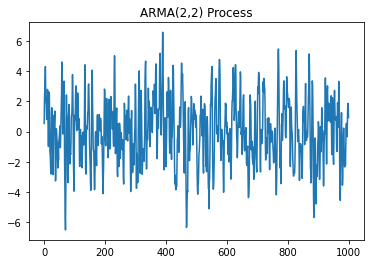

In [14]:
# Plotting time series and corresponding ACF

## Generating process (1000 observations)

##Plotting ACF, PACF & time series (just as for the other models)

# Autoregressive Integrated Moving Average (ARIMA)

So now that we have covered the constituent components of ARMA, we will adapt what we have learned so far to what are known as __autoregressive integrated moving average (ARIMA)__ models. ARIMA models allow us to extend the same framework ARMA is based off of to non-stationary time series! An ARIMA model is and ARMA model with the added aspect of __differencing__, which is __a useful way to remove a given trend in a time series to make it stationary__. We will learn this with the example below, where the time series represents monthly shampoo sales:

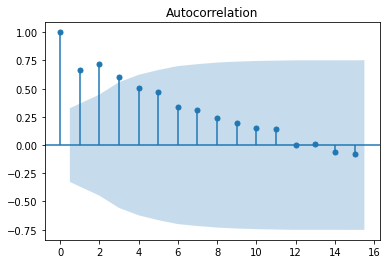

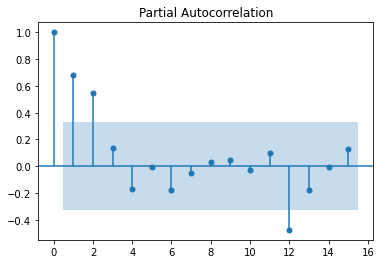

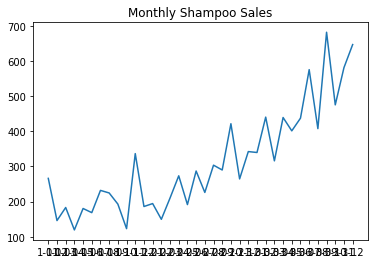

In [6]:
# Importing shampoo data
shampoo_df = pd.read_csv("../../DATA/shampoo_sales.csv")
sales = shampoo_df["Sales"]
months = shampoo_df["Month"]

# Visualizing data
plot_acf(sales, lags=15)
plot_pacf(sales, lags=15)
fig = plt.figure()
plt.plot(months, sales)
plt.title("Monthly Shampoo Sales")
fig.show()

We can see from the plots above that the data is clearly not stationary. In fact, the strong partial autocorrelation at a lag of 12 might imply __yearly seasonality__. We can confirm this analysis with the ADF test:

In [18]:
# Confirming non-stationarity of data
print("ADF Test:", adfuller(sales))

ADF Test: (3.0601420836411797, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 278.99726442630316)


As we get an incredibly high p-value, which is much larger than 0.05, meaning we cannot reject the null hypothesis. Therefore, to model this data, we must process it in such a way that the result of it becomes stationary. That is where differencing comes in. Let us consider the variable $Z_{t}$, such that:

$$Z_{t} = Y_{t+1} - Y_{t}$$

$Z_{t}$ is no longer the number of shampoo sales, but in fact the change in shampoo sales from one month to another. Let us compute $Z_{t}$ for our data and check if it is now stationary, as well as plot it.

ADF Test: (-7.249074055553854, 1.7998574141687034e-10, 1, 33, {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}, 275.32503579406307)


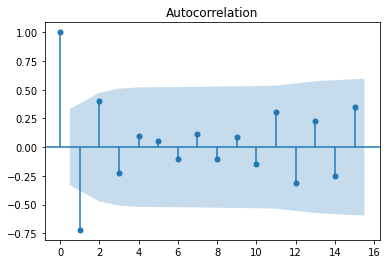

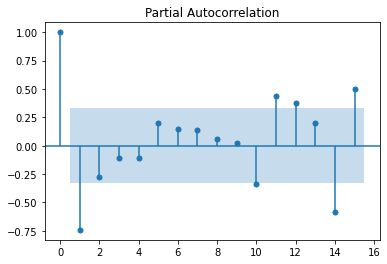

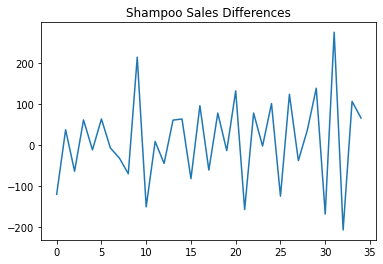

In [20]:
## Compute Z(t)

## Plot Z(t), and corresponding PACF and ACF

## Determine whether Z(t) is stationary

This is great news! After only taking one __differencing step__, our time series is already stationary, as our p-value is much lower than 0.05, allowing us to reject our null hypothesis. This is why ARIMA is much more powerful than a simple ARMA model. What we have used is known as a __first-order differencing__, which only takes the difference once. While this will generally suffice, depending on the type of problem, the result may still not be stationary. Therefore, the ARIMA allows any __order of differencing (d)__ as a hyperparameter. Thus arise the general form of ARIMA, which is __ARIMA(p,q,d)__. If we wanted to use second-order differencing, we would elaborate further on our processing and create some other variable, which we can call $W_{t}$, such that  $W_{t} = Z_{t+1} - Z_{t}$. 

Now that we have obtained a stationary time series, we can fit an ARMA model to this processed series. But which one? One of the most common methods is by fitting the model for multiple values of $p$ and $q$, and choosing the model with the lowest __Akaike information criterion (AIC)__, which is a metric that aims to deal with both underfitting and overfitting, given by:

$$AIC = 2k - 2ln(\hat{L})$$

Where $\hat{L}$ is the maximum value of the likelihood function for the model and $k$ is the number of estimated parameters. This is a powerful metric and fully implemented by _statsmodel_. It is important to note that the AIC cannot be used to determine the order of differencing. Additionally, AIC can only be used as a relative measure: a low AIC is not a measure of robust performance.

After understanding this process, let's create a function that takes in possible model orders and the data, and returns the AIC of the corresponding fitted ARIMA models.

In [49]:
from statsmodels.tsa.arima_model import ARIMA

## Function that returns optimal model orders
def aic_optimal(ps, d, qs, data):
    aic_table = []
    for p in ps:
        row = []
        for q in qs:
            try:
                model = ARIMA(data, order=(p, d, q)).fit(maxiter=5000)
                row.append(model.aic)
            except:
                row.append(np.nan)
        aic_table.append(row)
    return pd.DataFrame(data=aic_table, index=ps, columns=qs)


In [50]:
param_range = list(range(0, 7))
aic_df = aic_optimal(ps=param_range, d=1, qs=param_range, data=sales)
aic_df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian fai

,0,1,2,3,4,5,6
0,430.873112,409.012662,399.606261,401.538445,403.166109,403.38649,404.631007
1,406.022290,402.466652,401.524794,403.524173,NaN,NaN,NaN
2,403.627564,404.286214,NaN,NaN,NaN,NaN,NaN
3,404.692459,406.139544,NaN,NaN,406.679791,NaN,NaN
4,404.786769,406.579640,400.230780,400.656773,406.380848,NaN,NaN
5,406.339877,408.786688,400.725821,402.499631,404.681381,NaN,NaN
6,407.438707,408.482729,402.134217,403.720879,NaN,NaN,NaN


From our AIC table, the optimal model order seems to be the ARIMA(0, 1, 2) model. We can now use this information for forecasting on our original timeseries. How does forecasting work with ARIMA models? Well consider the example for first-order differencing, where we can rearrange the original equation, such that:

$$Y_{t+1} = Y_{t} + Z_{t}$$

Therefore, we predict the future values for the differences themselves, then add them to the observed values/predictions made. Below, we show how our ARIMA model fairs at forecasting for shampoo sales.

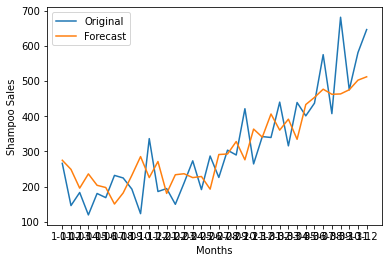

In [51]:
# from statsmodels.tsa.arima_model import SARIMA
# Forecasting shampoo sales for ARIMA(0,1,2)

# Splitting data into train and test data
train = sales[:30]
test = sales[30:]

# Fit model to training data
model = ARIMA(train, order=(4,1,2)).fit(max_iter=1000)
dif_forecast = model.predict(start=1, end=len(sales), typ='levels')
forecast = model.forecast(steps=len(test))[0]

# Plot Predicted time series
fig = plt.figure()
plt.plot(months, sales)
plt.plot(range(0, len(sales)), dif_forecast)
plt.xlabel("Months")
plt.ylabel("Shampoo Sales")
plt.legend(("Original", "Forecast"))
fig.show()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   29
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -155.452
Method:                       css-mle   S.D. of innovations             46.137
Date:                Tue, 13 Oct 2020   AIC                            326.904
Time:                        13:08:02   BIC                            337.842
Sample:                             1   HQIC                           330.329
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.9037      3.581      2.486      0.013       1.885      15.922
ar.L1.D.Sales    -0.2552      0.246     -1.036      0.300      -0.738       0.228
ar.L2.D.Sales    -0.4879      0.197     -2.482      0.013      -0.873      -0.103
ar.L3.D.Sales    -0.6914      0.188     -3.687      0.000      -1.059      -0.324
ar.L4.D.Sales    -0.0587      0.245     -0.239      0.811      -0.539       0.422
ma.L1.D.Sales    -0.9873      0.163     -6.075      0.000      -1.306      -0.669
ma.L2.D.Sales     1.0000      0.179      5.595      0.000       0.650       1.350
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3193           -1.0126j            1.0617           -0.2014
AR.2            0.3193           +1.0126j            1.0617            0.2014
AR.3           -1.3677           -0.0000j            1.3677           -0.5000
AR.4          -11.0527           -0.0000j           11.0527           -0.5000
MA.1            0.4936           -0.8697j            1.0000           -0.1678
MA.2            0.4936           +0.8697j            1.0000            0.1678
-----------------------------------------------------------------------------
"""

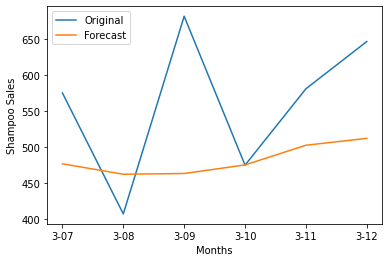

In [52]:
# Plotting only the forecast vs test set
fig = plt.figure()
plt.plot(months[len(train):len(sales)], sales[len(train):len(sales)])
plt.plot(months[len(train):len(sales)], dif_forecast[len(train):len(sales)])
plt.xlabel("Months")
plt.ylabel("Shampoo Sales")
plt.legend(("Original", "Forecast"))
fig.show()

We can see from this forecast, that while the ARIMA model is already able to capture the trend of the data, it is not a good fit for our shampoo sales data. While beyond the scope of this class, there are many different extensions from the conventional ARIMA model to account for various factors and make better forecasts under particular conditions. The __SARIMA__, which is ARIMA with included __seasonality__ components, might have been a good fit in this case. Other extensions may include __NARMA__ which allows for non-linear correlations with past values and the __ARMAX__ allows you to fit a model with given exogenous inputs.

When are ARMA and ARIMA models useful? They are typically used when a system is a functin of a series of unobersved 'shocks' as well as its own behaviour, like how stock prices may be 'shocked' by fundamental information as well as exhibiting technical trending and mean-reversion effects due to market participants

Rather than extensions of ARMA and ARIMA, the next few time series models we will encounter will use different frameworks.